In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv('/content/png/Air pollution.csv',sep =',',encoding='euc-kr')

In [ ]:
print(data)

In [ ]:
data.info()

In [5]:
def get_a(i):
   z = data['a'][i]
   return z

In [6]:
def mov_avg_filter(x_n, x_meas):
  n = len(x_n)
  for i in range(n-1):
    x_n[i] = x_n[i+1]
  x_n[n-1] = x_meas
  x_avg = np.mean(x_n)
  return x_avg, x_n

In [7]:
len(data)

25

In [8]:
n = 10
n_samples = 25
time_end = 10

In [9]:
dt = time_end / n_samples
time = np.arange(0, time_end, dt)
x_meas_save = np.zeros(n_samples)
x_avg_save = np.zeros(n_samples)

In [ ]:
for i in range(n_samples):

    x_meas = get_a(i)
    
    if i == 0:
        x_avg, x_n = x_meas, x_meas * np.ones(n)
        print(x_meas * np.ones(n))
    else:
        x_avg, x_n = mov_avg_filter(x_n, x_meas)
        print(x_n)

    x_meas_save[i] = x_meas
    x_avg_save[i] = x_avg

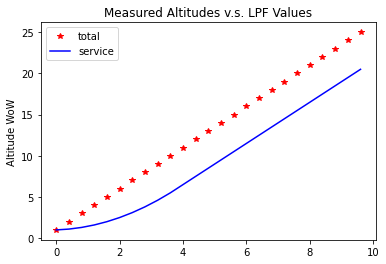

In [11]:
plt.plot(time, x_meas_save, 'r*', label='total')
plt.plot(time, x_avg_save, 'b-', label='service')
plt.legend(loc='upper left')
plt.title('Measured Altitudes v.s. LPF Values')
plt.ylabel('Altitude WoW')
plt.savefig('/content/png')